# Analyze a human kidney visium data with Seurat V5

The human kidney visium data can be download from the 10x website: https://www.10xgenomics.com/resources/datasets/human-kidney-11-mm-capture-area-ffpe-2-standard


In [1]:
library(Seurat)
options(Seurat.object.assay.version = "v5")
library(ggplot2)

Loading required package: SeuratObject

Loading required package: sp

The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, saveRDS


Loading Seurat v5 beta version 
To maintain compatibility with previous workflows, new Seurat objects will use the previous object structure by default
To use new Seurat v5 assays: Please run: options(Seurat.object.assay.version = 'v5')



In [2]:
human_visium <- Load10X_Spatial(data.dir="human_visium/", 
                filename = "CytAssist_11mm_FFPE_Human_Kidney_filtered_feature_bc_matrix.h5")

In [3]:
select_cells <- read.csv("zoom_visium.csv")

In [4]:
human_visium <- NormalizeData(human_visium, assay = "Spatial", verbose = FALSE)

Warning message:
“The following arguments are not used: layer”


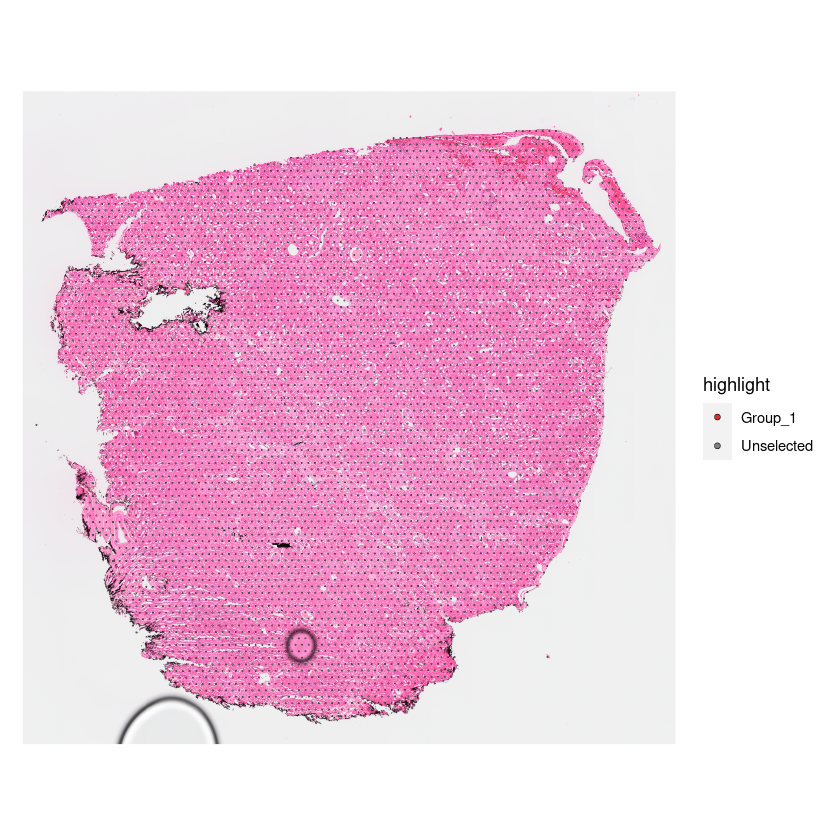

In [5]:
SpatialDimPlot(human_visium, crop = F, pt.size.factor = 1, 
               cells.highlight = select_cells$barcode) 

In [6]:
hi_res = Read10X_Image(image.dir="human_visium/spatial/", image.name = "tissue_hires_image.png")
human_visium@images$slice1 <- hi_res

In [7]:
col_val <- as.integer(human_visium@images$slice1@coordinates$imagecol)

In [8]:
human_visium@images$slice1@coordinates$imagecol <- human_visium@images$slice1@coordinates$imagerow

In [9]:
human_visium@images$slice1@coordinates$imagerow <- col_val

In [10]:
color.palette <- colorRampPalette(c('lightyellow1','darkolivegreen1','green4'))(255)

In [11]:
human_visium@images$slice1@scale.factors$lowres <- human_visium@images$slice1@scale.factors$hires

In [12]:
human_visium@images$slice1@coordinates$imagerow <- as.integer(human_visium@images$slice1@coordinates$imagerow)
human_visium@images$slice1@coordinates$imagecol <- as.integer(human_visium@images$slice1@coordinates$imagecol)
human_visium@meta.data$slice1_imagerow <- human_visium@images$slice1@coordinates$imagerow
human_visium@meta.data$slice1_imagecol <- human_visium@images$slice1@coordinates$imagecol

Warning message:
“Not validating Seurat objects”
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


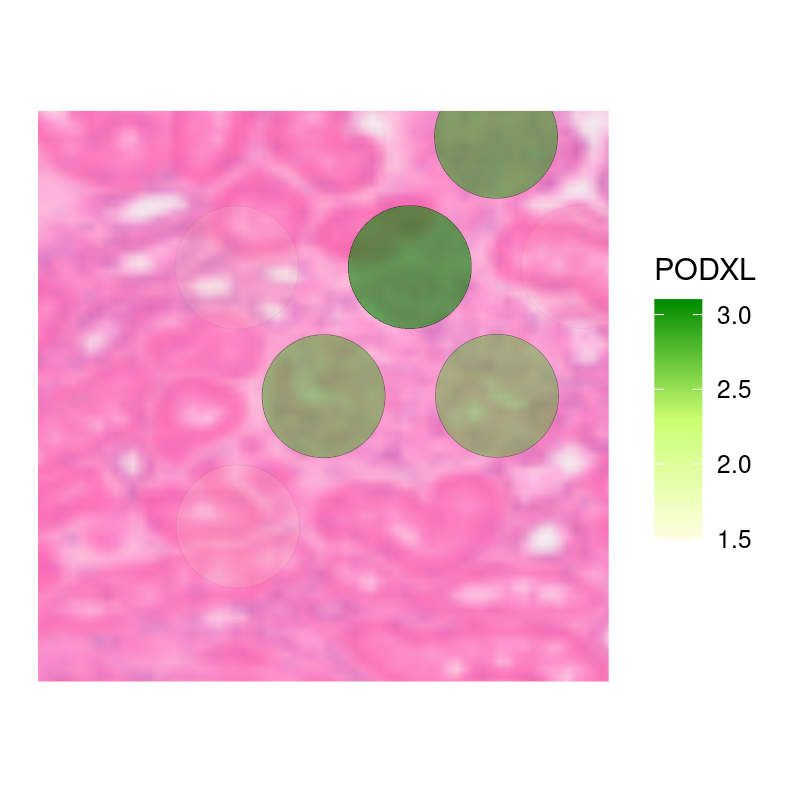

In [15]:
human_visium1 <- subset(human_visium, slice1_imagerow > 18700 & slice1_imagerow < 20000 & slice1_imagecol > 9300 & slice1_imagecol < 10440, invert = F)
options(repr.plot.width = 4, repr.plot.height = 4, repr.plot.res = 200)
SpatialFeaturePlot(object = human_visium1, features = c("PODXL"),
                   alpha = c(0, 0.6), pt.size.factor = 90, min.cutoff = 1.5) & 
    scale_fill_gradientn(colors  = color.palette) & theme(legend.position = "right")